### **Lab 8: Least Squares**

In this lab we will look at various forms of least squares interpolation. We will start with the most basic form in which a polynomial of degree 1 is used. This is also called a linear regression.


#### **1. Building the H Matrix for Linear Regression**

Least squares is the process of finding the function of the form:

$y = Ha$

that for a given set of datapoints, minimizes the square of the residuals represented by:

$\sum\limits_{i=0}^n R_i^2 = \sum\limits_{i=0}^n(H_ia - y_i)^2$

Given the datapoints:
```
x = np.array([1,2,3,4,5])
y = np.array([8.3,8.4,9.1,9.3,9.8])
```
For a polynomial fit, we may choose a function of the form,

$f(x) = \sum\limits_{j = 0}^m {{a_j}} {x^j}$

*   What should $m$ be for a linear regression?

*   Write out this summation by hand for the linear regression case.

*   What should the dimensions of the $H$ matrix be for this set of datapoints if we intend to use a linear regression?


Create a for loop that creates the $H$ matrix for the given set of data using a linear fit.


In [1]:
# Starter code

%reset -f
import numpy as np
x = np.array([1, 2, 3, 4, 5],dtype = float)
y = np.array([8.3, 8.4, 9.1, 9.3, 9.8],dtype = float)

# Create H

n = len(x)
m = 1 #since it's linear

H = np.zeros((n, m+1)) #5 x 2, where 2 is the degree + 1

for i in range(n):
    #H[i,:] = [x[i]**0, x[i]**1]
    H[i,:] = [1, x[i]]
    
print(H)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


#### **2. Calculate the Coefficient Vector $a$**

Given the $H$ calculated in question 1, multiply both sides of the equation by $H^T$ to obtain:

$Ha = y$

$H^THa = H^Ty$

Use a NumPy solver to solve for $a$. Once you have solved for $a$, print it and plot your best fit line against the datapoints.

[[ 5. 15.]
 [15. 55.]]
[ 44.9 138.6]
Coefficient list: [7.81 0.39]


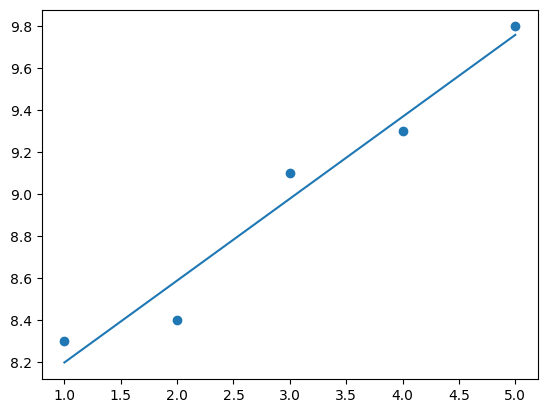

In [2]:
# Starter code
import matplotlib.pyplot as plt
import numpy as np

HTH = H.T @ H
HTy = H.T @ y

print(HTH)
print(HTy)

a = np.linalg.solve(HTH, HTy)

print(f"Coefficient list: {a}")

x_vals = np.linspace(x[0], x[-1:])
y_vals = np.zeros_like(x_vals)

for i in range(len(x_vals)):
    y_vals[i] = a[0] + a[1] * x_vals[i]

plt.scatter(x, y)
plt.plot(x_vals, y_vals)

#### **3. Generalizing Least Squares to Higher Degree Polynomials**

Modify your code from steps 1 and 2 to create the function:
```
def leastSquaresPoly(x,y,m)
```
where the inputs are the $x$ and $y$ data and the degree of the fit line $m$, and the output is the coefficient vector $a$.

Plot your fit and the datapoints together. Include appropriate plot titles.

**Test your function with a polynomial of degree 1, 2, and 3** using the data given in the code below.

Which degree of approximation seems to best fit the data set?

Run the code block in below to initiallize a new, larger set of data.

In [3]:
#Data for part 3 - provided code
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(10,20,100)
y = []

for i in x:
  c = np.random.uniform(low=0.5, high=1, size=(4,))
  y.append(c[0]*i**3+c[1]*i**2+c[2]*i+c[3])

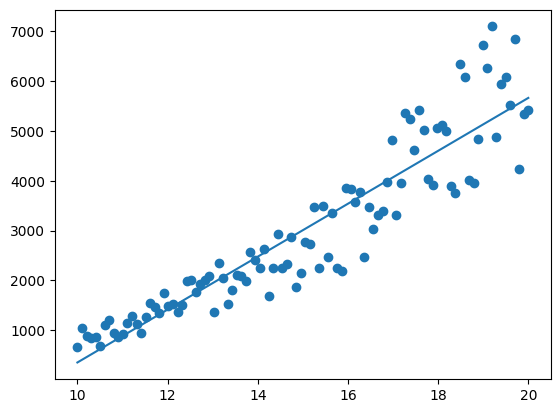

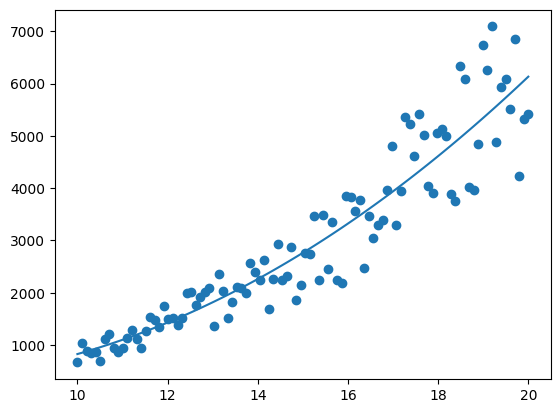

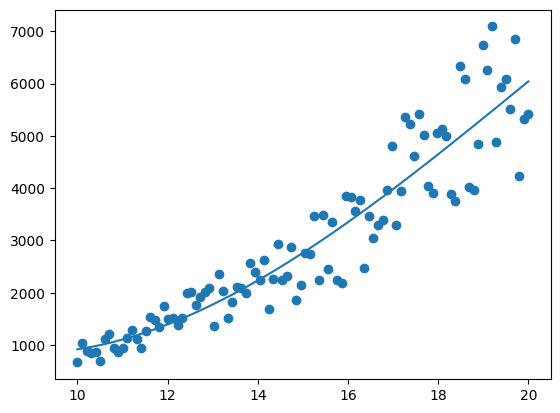

In [4]:
# Starter code
def leastSquaresPoly(x,y,m):
    # Create H

    n = len(x)

    H = np.zeros((n, m+1)) #5 x 2, where 2 is the degree + 1

    for j in range(m+1):
        for i in range(n):
            H[i, j]= x[i]**j
    
    # H solving for coefficients
    
    HTH = H.T @ H
    HTy = H.T @ y
    a = np.linalg.solve(HTH, HTy)

    return a

for m in range(1, 4):
    a = leastSquaresPoly(x, y, m)

    x_vals = np.linspace(x[0], x[-1:], 100)
    y_vals = np.zeros_like(x_vals) 

    for i in range(len(x_vals)):
        summ = 0
        for j in range(m + 1):
            summ += x_vals[i]**j*a[j]
        y_vals[i] = summ

    plt.scatter(x,y)
    plt.plot(x_vals, y_vals)
    plt.show()


#### **4. Least Squares for General Functions**

What if we wanted our function to be something other than a polynomial, for example $e^x$ or $\cos(x)$?

What would the first row of $H$ be if we wanted to fit our data with the function given below given that the first datapoint is x = 1?

$F(x) = a_0 + a_1x + a_2\cos(\pi x)$

Try fitting the new set of data given below with a fit line of the above form.

Lets do this by making a function $G(x)$ that returns a row of $H$. We will call this function inside of our least squares function as we fill out our $H$ matrix.

In [5]:
#Data for part 4 - provided code
x = np.linspace(0,10,42)
y = []

for i in x:
  c = np.random.uniform(low=0.5, high=20, size=(2,))
  y.append(200*np.cos(i*np.pi)+c[0]*i+c[1])

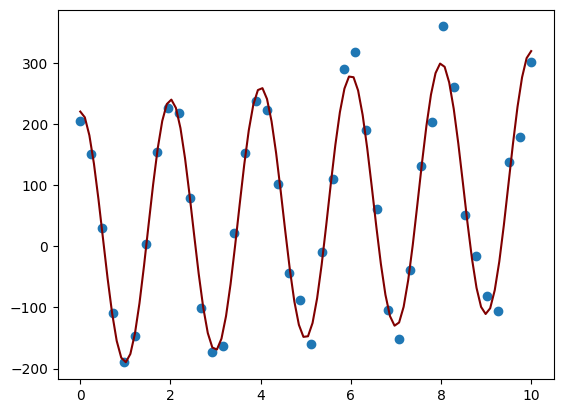

In [6]:
# Starter code
def G(x):
    return np.array([1.0, x, np.cos(np.pi*x)], dtype = object)
    
def leastSquaresGeneral(x,y,G):
    n = len(x)
    m = len(G(x[0]))
    H = np.zeros([n,m])

    for i in range(n):
        H[i,:] = G(x[i])

    HTH = H.T @ H
    HTy = H.T @ y
    a = np.linalg.solve(HTH, HTy)

    return a

a = leastSquaresGeneral(x, y, G)

x_vals = np.linspace(x[0], x[-1:], 100)
y_vals = np.zeros_like(x_vals)  

for i in range(len(x_vals)):
    Gx = G(x_vals[i])
    yi = np.dot(Gx, a)
    y_vals[i] = yi

plt.scatter(x, y)
plt.plot(x_vals, y_vals, color = "maroon")
plt.show()    

#### **5. Let's Try an Exponenetial**

Given the data in the code block below, fit the data using your function of the form:

$F(x) = a_0 + a_1e^x$

You should be able to do this by only changing the function G(x).


In [7]:
#Data for part 5 - provided code
x = np.linspace(0,10,14)
y = []

for i in x:
  c = np.random.uniform(low=0.5, high=10, size=(2,))
  y.append(100*c[0]+c[1]*np.exp(i))

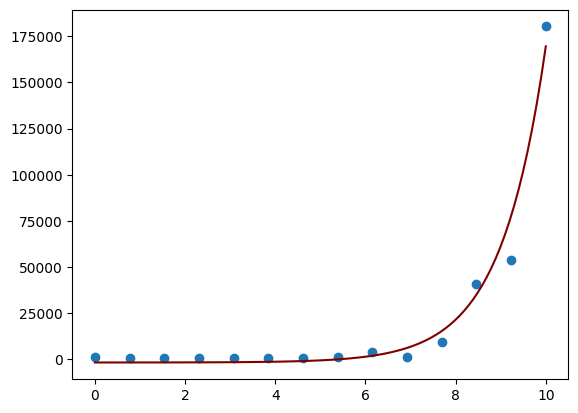

In [8]:
# Starter code
def G2(x):
    return np.array([1, np.exp(x)], dtype = object)
    
def leastSquaresGeneral(x,y,G):
    n = len(x)
    m = len(G(x[0]))
    H = np.zeros([n,m])

    for i in range(n):
        H[i,:] = G(x[i])

    HTH = H.T @ H
    HTy = H.T @ y
    a = np.linalg.solve(HTH, HTy)

    return a

a = leastSquaresGeneral(x, y, G2)

x_vals = np.linspace(x[0], x[-1:], 100)
y_vals = np.zeros_like(x_vals)

for i in range(len(x_vals)):
    Gx = G2(x_vals[i])
    yi = np.dot(Gx, a)
    y_vals[i] = yi

plt.scatter(x, y)
plt.plot(x_vals, y_vals, color = "maroon")
plt.show()    

#### **6. More Advanced Exponentials**

What if we wanted a fit of the form:

$F(x) = a_0e^{a_1x}$

We can no longer write our $H$ matrix as we did before. Instead we must take the natural log of the above equation and seperate out the terms. **Do this by hand first**


We are now in the naural log space and we must therefore also take the natural log of our data.

Modify your code from the previous section to account for these changes.

In [9]:
#Data for part 6 - provided code
x = np.linspace(1,20,27)
y = []

for i in x:
  c = np.random.uniform(low=0.1, high=0.5, size=(2,))
  y.append(c[0]*np.exp(.2*i))

[-1.65208006  0.21967343]


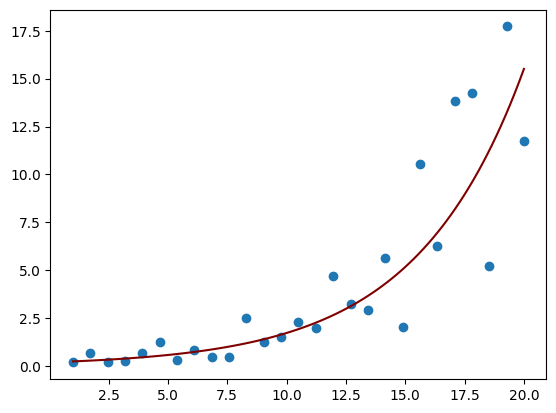

In [10]:
# Starter code

def G3(x):
    return np.array([1, x], dtype = object)

a = leastSquaresGeneral(x, np.log(y), G3)

print(a)
x_vals = np.linspace(x[0], x[-1:], 100)
y_vals = np.zeros_like(x_vals)  

for i in range(len(x_vals)):
    y_vals[i] = np.exp(a[0] + a[1]*x_vals[i])

plt.scatter(x, y)
plt.plot(x_vals, y_vals, color = "maroon")
plt.show()  